In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
drug = [54, 73, 53, 70, 73, 68, 52, 65, 65]

In [5]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

In [6]:
df1["effects"] = placebo

In [7]:
df1["label"] = "P"

In [8]:
df2["effects"] = drug
df2["label"] = "D"

In [9]:
df3 = pd.concat([df1,df2]).reset_index(drop=True)

In [10]:
df3.head()

,effects,label
0,54,P
1,51,P
2,58,P
3,44,P
4,55,P


In [11]:
df3.groupby("label").mean()

,effects
label,
D,63.666667
P,50.700000


In [12]:
means = df3.groupby("label").mean().values
means

array([[63.66666667],
       [50.7       ]])

In [13]:
diff_mean1 = means[0][0] - means[1][0]

### Mean of drug vs placebo

In [14]:
diff_mean1

12.966666666666661

In [15]:
diff_mean = np.zeros(10000, dtype = float)

In [16]:
for i in range(10000):
    df3["effects"]=np.random.permutation(df3.effects.values)
    means = df3.groupby("label").mean().values
    diff_mean[i] = means[0][0] - means[1][0]

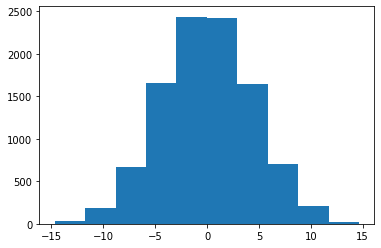

In [17]:
plt.hist(diff_mean)
#plt.axvline(x = 0, c='r',label ="zero")
plt.show()

### If we randomly shuffle labels, the mean advantage, over A LOT of simulations, will converge to 0
### Hence mean of 13, is unlikely from this simulation...hence it could not have come up randomly
### Therefore it is likely that the drug works.. 

In [18]:
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
drug = [54, 73, 53, 70, 73, 68, 52, 65, 65]
mean_adv = np.zeros(10000)
for i in range(10000):
    boot_index_placebo = np.random.choice(placebo, size=len(placebo))
    boot_index_drug = np.random.choice(drug, size=len(drug))
    mean_adv[i] = boot_index_drug.mean() - boot_index_placebo.mean()

fiveperc = int(np.percentile(mean_adv, 5))
ninetyfiveperc = int(np.percentile(mean_adv, 95))
mean = int(mean_adv.mean())

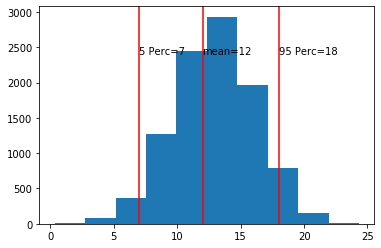

In [19]:
##### plt.hist(mean_adv)
plt.hist(mean_adv)
plt.axvline(x = fiveperc, c='r')
plt.axvline(x = ninetyfiveperc, c='r',label ="zero")
plt.axvline(x = mean, c='r',label ="zero")
plt.text(mean,2400, "mean={}".format(mean))
plt.text(fiveperc,2400, "5 Perc={}".format(fiveperc))
plt.text(ninetyfiveperc,2400, "95 Perc={}".format(ninetyfiveperc))
plt.show()

### 0 is not in the graph, hence drug definitely has some benefit over placebo in most simulations
### the mean advantage of drug over placebo varies between 7 and 18 ----> (5pcentile, 95pcentile)
### so the drug has an effect of 7 to 18 units over placebo, with mean being 13 units